<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>CPE352 Data Science</center>
# <center>Lecture 7 - Machine Learning - Classification</center>
---

# 1. Load data

In [ ]:
import pandas as pd
pd.set_option('max_columns',500)
telcoData = pd.read_csv('M1_telco.csv', na_values=' ')
telcoData.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# 2. Clean data

In [ ]:
telcoData.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [ ]:
telcoData.fillna(0, inplace=True)

In [ ]:
telcoData.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

# 3. Select relevant columns

In [ ]:
telcoData.set_index('customerID', inplace=True)
telcoData.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG           29.85         29.85    No  
5575-GNVDE           56.95       1889.50    No  
3668-QPYBK           53.85        108.15   Yes  
7795-CFOCW           42.30       1840.75    No  
9237-HQITU           70.70        151.65   Yes

# Activity: Data preparation
1. Transform categorical variable into multiple binary columns (get_dummies, drop_first)
2. Concatenate with numerical data

In [ ]:
# Work here

In [ ]:
df_catego = pd.get_dummies(telcoData.select_dtypes('object'),drop_first=True)

In [ ]:
df_numeri = telcoData.select_dtypes('number')

In [ ]:
df_final = pd.concat([df_numeri,df_catego],axis=1)

# Activity: Sample your data
1. Sample your data into 2 sets: 70%, 30%
2. Check distribution of churn variables. See if they are still similar to the original distribution

In [ ]:
# Work here

In [ ]:
telcoData_train = df_final.sample(frac=0.7)

In [ ]:
telcoData_train.index

Index(['8809-RIHDD', '8917-FAEMR', '2277-AXSDC', '0068-FIGTF', '5312-TSZVC',
       '0727-BNRLG', '1089-HDMKP', '1658-TJVOA', '6473-ULUHT', '3442-ZHHCC',
       ...
       '3838-OZURD', '5057-RKGLH', '3585-ISXZP', '7235-NXZCP', '0744-BIKKF',
       '7486-KSRVI', '0363-QJVFX', '3243-ZHOHY', '4854-SSLTN', '7683-CBDKJ'],
      dtype='object', name='customerID', length=4930)

In [ ]:
telcoData_train.shape

(4930, 31)

In [ ]:
telcoData_test = df_final.drop(index=telcoData_train.index)

In [ ]:
telcoData_test.shape

(2113, 31)

In [ ]:
df_final.shape

(7043, 31)

# 4. Train a decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(telcoData_train.drop(columns='Churn_Yes'), 
         telcoData_train['Churn_Yes'])

DecisionTreeClassifier(min_samples_leaf=10)

# 5. Plot a decision tree

In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                rotate=True,
                feature_names=telcoData_train.columns[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tree.png')
Image(graph.create_png())

# 6. Variable importance

In [ ]:
pd.DataFrame(dict(Feature=telcoData_train.columns[:-1],
                  Value=tree.feature_importances_))\
  .sort_values(by='Value', ascending=False)

Feature     Value
1                                  tenure  0.319568
10            InternetService_Fiber optic  0.205185
2                          MonthlyCharges  0.124555
3                            TotalCharges  0.103725
25                      Contract_Two year  0.038856
24                      Contract_One year  0.029610
4                             gender_Male  0.026090
28         PaymentMethod_Electronic check  0.022332
26                   PaperlessBilling_Yes  0.019896
14       OnlineBackup_No internet service  0.018297
13                     OnlineSecurity_Yes  0.015712
23                    StreamingMovies_Yes  0.014066
19                        TechSupport_Yes  0.010628
0                           SeniorCitizen  0.008678
6                          Dependents_Yes  0.008242
9                       MultipleLines_Yes  0.005978
7                        PhoneService_Yes  0.005068
15                       OnlineBackup_Yes  0.004930
21                        StreamingTV_Yes  0.004406
5                             Partner_Yes  0.004140
17                   DeviceProtection_Yes  0.003330
27  PaymentMethod_Credit card (automatic)  0.002411
29             PaymentMethod_Mailed check  0.002286
11                     InternetService_No  0.002012
18        TechSupport_No internet service  0.000000
20        StreamingTV_No internet service  0.000000
22    StreamingMovies_No internet service  0.000000
16   DeviceProtection_No internet service  0.000000
12     OnlineSecurity_No internet service  0.000000
8          MultipleLines_No phone service  0.000000

# 7. Prediction

In [ ]:
tree.predict(telcoData_test.drop(columns='Churn_Yes'))

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [ ]:
tree.predict_proba(telcoData_test.drop(columns='Churn_Yes'))

array([[0.63157895, 0.36842105],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.2       , 0.8       ]])

# 8. Classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
res = tree.predict(telcoData_test.drop(columns='Churn_Yes'))
print(classification_report(y_true=telcoData_test['Churn_Yes'].values, y_pred=res))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1551
           1       0.59      0.51      0.55       562

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



# 9. LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(telcoData_train.drop(columns='Churn_Yes'), telcoData_train['Churn_Yes'])

LinearDiscriminantAnalysis()

In [ ]:
pd.DataFrame(dict(Feature = telcoData_train.columns[:-1],
                  Coefficient = lda.coef_[0]))

Feature  Coefficient
0                           SeniorCitizen     0.295734
1                                  tenure    -0.015411
2                          MonthlyCharges    -0.028428
3                            TotalCharges    -0.000280
4                             gender_Male    -0.026013
5                             Partner_Yes     0.092124
6                          Dependents_Yes    -0.192964
7                        PhoneService_Yes     0.192984
8          MultipleLines_No phone service    -0.192984
9                       MultipleLines_Yes     0.441456
10            InternetService_Fiber optic     1.974345
11                     InternetService_No    -0.261229
12     OnlineSecurity_No internet service    -0.261229
13                     OnlineSecurity_Yes    -0.285539
14       OnlineBackup_No internet service    -0.261229
15                       OnlineBackup_Yes     0.048497
16   DeviceProtection_No internet service    -0.261229
17                   DeviceProtection_Yes     0.066664
18        TechSupport_No internet service    -0.261229
19                        TechSupport_Yes    -0.258129
20        StreamingTV_No internet service    -0.261229
21                        StreamingTV_Yes     0.705411
22    StreamingMovies_No internet service    -0.261229
23                    StreamingMovies_Yes     0.563471
24                      Contract_One year    -0.761008
25                      Contract_Two year    -0.502051
26                   PaperlessBilling_Yes     0.245860
27  PaymentMethod_Credit card (automatic)     0.003733
28         PaymentMethod_Electronic check     0.474754
29             PaymentMethod_Mailed check    -0.062747

# 10. Predicting with LDA

In [ ]:
res_lda = lda.predict(telcoData_test.drop(columns='Churn_Yes'))
print(classification_report(y_true=telcoData_test['Churn_Yes'].values, y_pred=res_lda))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1551
           1       0.64      0.58      0.61       562

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



# 11. Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(telcoData_train.drop(columns='Churn_Yes'), telcoData_train['Churn_Yes'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# 12. Coefficient

In [ ]:
pd.DataFrame(dict(Feature = telcoData_train.columns[:-1],
                  Coefficient = lr.coef_[0]))

Feature  Coefficient
0                           SeniorCitizen     0.294441
1                                  tenure    -0.070708
2                          MonthlyCharges     0.005091
3                            TotalCharges     0.000406
4                             gender_Male    -0.012597
5                             Partner_Yes     0.028912
6                          Dependents_Yes    -0.229957
7                        PhoneService_Yes    -0.245997
8          MultipleLines_No phone service     0.088774
9                       MultipleLines_Yes     0.185344
10            InternetService_Fiber optic     0.442298
11                     InternetService_No    -0.130031
12     OnlineSecurity_No internet service    -0.130031
13                     OnlineSecurity_Yes    -0.526479
14       OnlineBackup_No internet service    -0.130031
15                       OnlineBackup_Yes    -0.182544
16   DeviceProtection_No internet service    -0.130031
17                   DeviceProtection_Yes    -0.193995
18        TechSupport_No internet service    -0.130031
19                        TechSupport_Yes    -0.520473
20        StreamingTV_No internet service    -0.130031
21                        StreamingTV_Yes     0.098330
22    StreamingMovies_No internet service    -0.130031
23                    StreamingMovies_Yes     0.012705
24                      Contract_One year    -0.278261
25                      Contract_Two year    -0.353984
26                   PaperlessBilling_Yes     0.325355
27  PaymentMethod_Credit card (automatic)    -0.148381
28         PaymentMethod_Electronic check     0.398604
29             PaymentMethod_Mailed check    -0.270377

# 13. Prediction and evaluation

In [ ]:
res_lr = lr.predict(telcoData_test.drop(columns='Churn_Yes'))
print(classification_report(y_true=telcoData_test['Churn_Yes'].values, y_pred=res_lr))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1551
           1       0.67      0.56      0.61       562

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



# Lab - Heart Disease

## Task
Build ML model to classify patients with heart disease.
## Due Date
29 October 2020
Submit the PDF file of this notebook to LEB2
## Data
Data is in the file "heart.csv"
### Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "target" field refers to the presence of heart disease in the patient, 0 for not present and 1 for present.

### Content

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 0 for normal, 1 for heart disease

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

Reference: https://www.kaggle.com/ronitf/heart-disease-uci

In [ ]:
# Work here

In [ ]:
heartData = pd.read_csv('/content/heart.csv')
heartData.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [ ]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#Clean data

In [ ]:
heartData.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
cata_column = ["sex","cp","fbs","restecg","exang","thal","target"]

In [ ]:
heartDatacat = heartData[cata_column].astype(str)

In [ ]:
heartDatacat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sex      303 non-null    object
 1   cp       303 non-null    object
 2   fbs      303 non-null    object
 3   restecg  303 non-null    object
 4   exang    303 non-null    object
 5   thal     303 non-null    object
 6   target   303 non-null    object
dtypes: object(7)
memory usage: 16.7+ KB


In [ ]:
heartData_num = heartData.drop(columns=heartDatacat)

In [ ]:
heartData_num

age  trestbps  chol  thalach  oldpeak  slope  ca
0     63       145   233      150      2.3      0   0
1     37       130   250      187      3.5      0   0
2     41       130   204      172      1.4      2   0
3     56       120   236      178      0.8      2   0
4     57       120   354      163      0.6      2   0
..   ...       ...   ...      ...      ...    ...  ..
298   57       140   241      123      0.2      1   0
299   45       110   264      132      1.2      1   0
300   68       144   193      141      3.4      1   2
301   57       130   131      115      1.2      1   1
302   57       130   236      174      0.0      1   1

[303 rows x 7 columns]

# Data preparation

In [ ]:
df_cate= pd.get_dummies(heartDatacat,drop_first=True)

In [ ]:
df_cate

sex_1  cp_1  cp_2  cp_3  fbs_1  restecg_1  restecg_2  exang_1  thal_1  \
0        1     0     0     1      1          0          0        0       1   
1        1     0     1     0      0          1          0        0       0   
2        0     1     0     0      0          0          0        0       0   
3        1     1     0     0      0          1          0        0       0   
4        0     0     0     0      0          1          0        1       0   
..     ...   ...   ...   ...    ...        ...        ...      ...     ...   
298      0     0     0     0      0          1          0        1       0   
299      1     0     0     1      0          1          0        0       0   
300      1     0     0     0      1          1          0        0       0   
301      1     0     0     0      0          1          0        1       0   
302      0     1     0     0      0          0          0        0       0   

     thal_2  thal_3  target_1  
0         0       0         1  
1         1       0         1  
2         1       0         1  
3         1       0         1  
4         1       0         1  
..      ...     ...       ...  
298       0       1         0  
299       0       1         0  
300       0       1         0  
301       0       1         0  
302       1       0         0  

[303 rows x 12 columns]

In [ ]:
df_final2 = pd.concat([heartData_num,df_cate],axis=1) 

In [ ]:
df_final2

age  trestbps  chol  thalach  oldpeak  slope  ca  sex_1  cp_1  cp_2  \
0     63       145   233      150      2.3      0   0      1     0     0   
1     37       130   250      187      3.5      0   0      1     0     1   
2     41       130   204      172      1.4      2   0      0     1     0   
3     56       120   236      178      0.8      2   0      1     1     0   
4     57       120   354      163      0.6      2   0      0     0     0   
..   ...       ...   ...      ...      ...    ...  ..    ...   ...   ...   
298   57       140   241      123      0.2      1   0      0     0     0   
299   45       110   264      132      1.2      1   0      1     0     0   
300   68       144   193      141      3.4      1   2      1     0     0   
301   57       130   131      115      1.2      1   1      1     0     0   
302   57       130   236      174      0.0      1   1      0     1     0   

     cp_3  fbs_1  restecg_1  restecg_2  exang_1  thal_1  thal_2  thal_3  \
0       1      1          0          0        0       1       0       0   
1       0      0          1          0        0       0       1       0   
2       0      0          0          0        0       0       1       0   
3       0      0          1          0        0       0       1       0   
4       0      0          1          0        1       0       1       0   
..    ...    ...        ...        ...      ...     ...     ...     ...   
298     0      0          1          0        1       0       0       1   
299     1      0          1          0        0       0       0       1   
300     0      1          1          0        0       0       0       1   
301     0      0          1          0        1       0       0       1   
302     0      0          0          0        0       0       1       0   

     target_1  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
298         0  
299         0  
300         0  
301         0  
302         0  

[303 rows x 19 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train,test = train_test_split(df_final2,train_size=0.7)

In [ ]:
train.index

Int64Index([169, 134, 237, 187, 156, 209, 133, 104,  96, 246,
            ...
             62, 148, 210, 109,   6, 201,  13,  68, 163, 241],
           dtype='int64', length=212)

In [ ]:
test.index

Int64Index([165, 278, 293,  39,  73, 141, 162, 248, 140, 189,  34, 247,  50,
             58,  97, 300,  32, 211, 118, 152, 280, 267,  30, 220, 196, 228,
            218, 111, 184, 136,  10, 144,   7,  63, 215,  66, 251,  90,  12,
            240,  24, 119, 216,  74,   5, 282,  42, 137, 229, 173, 178,  37,
             78, 166, 139, 283, 234, 105, 116, 261, 146, 290, 175, 207, 188,
            181,  91, 171, 205, 145, 230, 295,  41, 174, 135,  70, 259, 126,
            245,  20, 249, 281, 279, 274,  99, 158, 112, 167,  49,  76, 154],
           dtype='int64')

In [ ]:
pd.crosstab(train["target_1"],columns="prob",normalize=True) #เช็คการกระจายตัวของข้อมูล

col_0         prob
target_1          
0         0.443396
1         0.556604

In [ ]:
pd.crosstab(test["target_1"],columns="prob",normalize=True)

col_0         prob
target_1          
0         0.483516
1         0.516484

In [ ]:
train.shape

(212, 19)

In [ ]:
test.shape

(91, 19)

In [ ]:
df_final2.shape

(303, 19)

# Train a decision tree model

In [ ]:
tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(train.drop(columns='target_1'), 
         train['target_1'])

DecisionTreeClassifier(min_samples_leaf=10)

# Plot a decision tree


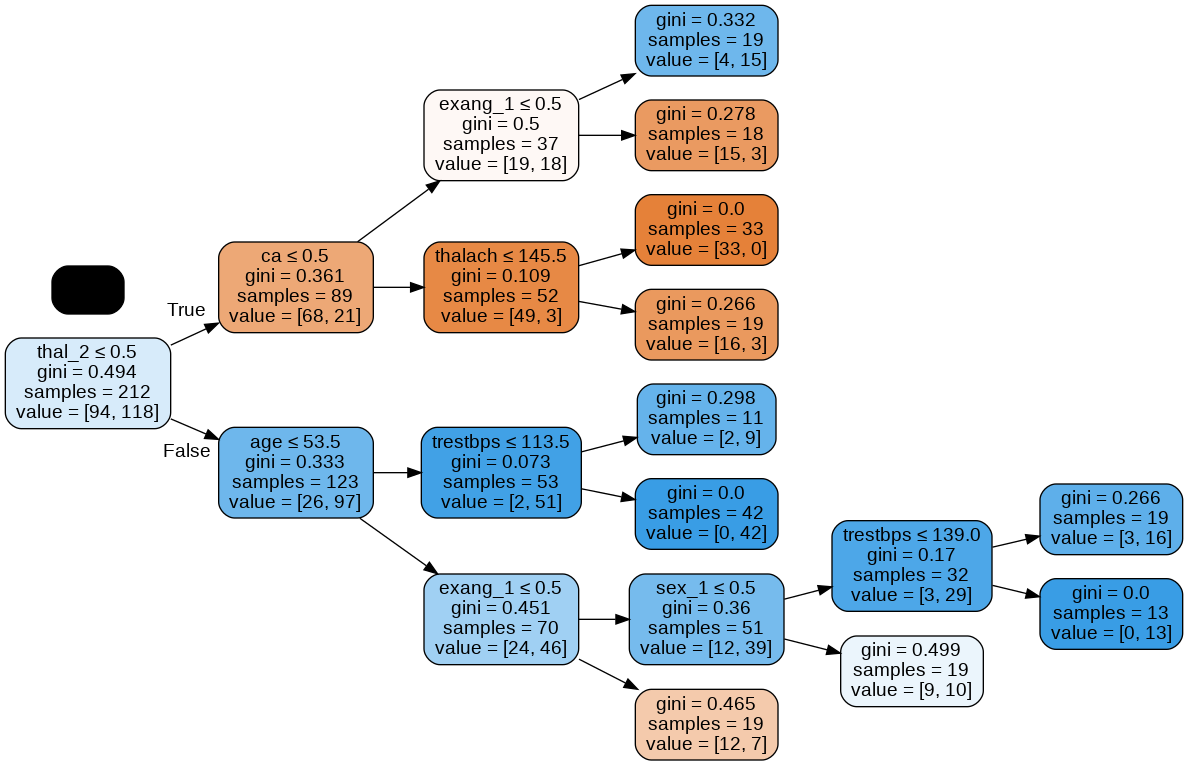

In [ ]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                rotate=True,
                feature_names=train.columns[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tree.png')
Image(graph.create_png())

#Prediction


In [ ]:
tree.predict(test.drop(columns='target_1'))

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1], dtype=uint8)

In [ ]:
tree.predict_proba(test.drop(columns='target_1'))

array([[0.63157895, 0.36842105],
       [0.15789474, 0.84210526],
       [0.21052632, 0.78947368],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.84210526, 0.15789474],
       [0.        , 1.        ],
       [0.21052632, 0.78947368],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.84210526, 0.15789474],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.18181818, 0.81818182],
       [0.21052632, 0.78947368],
       [0.83333333, 0.16666667],
       [0.        , 1.        ],
       [0.18181818, 0.81818182],
       [0.84210526, 0.15789474],
       [0.        , 1.        ],
       [0.21052632, 0.78947368],
       [1.        , 0.        ],
       [0.84210526, 0.15789474],
       [0.21052632, 0.78947368],
       [0.15789474, 0.84210526],
       [0.

# Classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
res = tree.predict(test.drop(columns='target_1'))
print(classification_report(y_true=test['target_1'].values, y_pred=res))

              precision    recall  f1-score   support

           0       0.83      0.66      0.73        44
           1       0.73      0.87      0.80        47

    accuracy                           0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.77      0.77        91



#Variable importance

In [ ]:
pd.DataFrame(dict(Feature=train.columns[:-1],
                  Value=tree.feature_importances_))\
  .sort_values(by='Value', ascending=False)

Feature     Value
16     thal_2  0.511804
14    exang_1  0.186892
6          ca  0.128984
0         age  0.091125
7       sex_1  0.055844
1    trestbps  0.015596
3     thalach  0.009755
11      fbs_1  0.000000
15     thal_1  0.000000
13  restecg_2  0.000000
12  restecg_1  0.000000
9        cp_2  0.000000
10       cp_3  0.000000
8        cp_1  0.000000
5       slope  0.000000
4     oldpeak  0.000000
2        chol  0.000000
17     thal_3  0.000000

#LDA

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(train.drop(columns='target_1'), train['target_1'])

LinearDiscriminantAnalysis()

In [ ]:
pd.DataFrame(dict(Feature = train.columns[:-1],
                  Coefficient = lda.coef_[0]))

Feature  Coefficient
0         age    -0.026131
1    trestbps    -0.008169
2        chol    -0.000956
3     thalach     0.020405
4     oldpeak    -0.119496
5       slope     0.648722
6          ca    -0.985426
7       sex_1    -1.690018
8        cp_1     2.231033
9        cp_2     3.160458
10       cp_3     2.589591
11      fbs_1     0.187736
12  restecg_1     0.624405
13  restecg_2    -1.829609
14    exang_1    -1.678791
15     thal_1    -0.323616
16     thal_2     0.000353
17     thal_3    -1.990827

In [ ]:
res_lda = lda.predict(test.drop(columns='target_1'))
print(classification_report(y_true=test['target_1'].values, y_pred=res_lda))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        44
           1       0.74      0.85      0.79        47

    accuracy                           0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



#Logistic regression

In [ ]:
lr = LogisticRegression()
lr.fit(train.drop(columns='target_1'), train['target_1'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pd.DataFrame(dict(Feature = train.columns[:-1],
                  Coefficient = lr.coef_[0]))

Feature  Coefficient
0         age    -0.009373
1    trestbps    -0.007814
2        chol    -0.003333
3     thalach     0.021616
4     oldpeak    -0.198262
5       slope     0.447844
6          ca    -0.904691
7       sex_1    -1.103025
8        cp_1     0.439991
9        cp_2     1.740951
10       cp_3     0.643775
11      fbs_1     0.254632
12  restecg_1     0.660331
13  restecg_2    -0.119737
14    exang_1    -1.454154
15     thal_1     0.159435
16     thal_2     0.506328
17     thal_3    -0.804054

In [ ]:
res_lr = lr.predict(test.drop(columns='target_1'))
print(classification_report(y_true=test['target_1'].values, y_pred=res_lr))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79        44
           1       0.78      0.85      0.82        47

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

